<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Distribute_Datasets_for_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Lesson: Dataset Distribution for Classification Models

Welcome!  
In this notebook, we’ll explore how datasets are distributed in classification problems.  
You’ll learn:

1. What class distribution means  
2. Why balanced datasets are important  
3. How to split data into train/test sets  
4. Problems caused by **imbalanced datasets**  
5. Techniques to fix imbalance: undersampling, oversampling, SMOTE  

---


# ⚖️ What is Class Imbalance?

👉 In **classification problems**, class imbalance happens when the number of samples in each class is **not evenly distributed**.

* One class has **much more data** (majority class).
* Other classes have **very little data** (minority class).

---

## 🔹 Example

Imagine a **medical dataset** with 1000 patients:

* **950 healthy** 🟢
* **50 with disease** 🔴

This is **imbalanced** because:

* Model might just predict **“healthy” for everyone** and still be **95% accurate**.
* But it completely **fails to detect the disease** — which is the real goal!

---

## 🔹 Why is Imbalance a Problem?

* **High accuracy can be misleading** (predicting only the majority).
* Model becomes **biased** toward the majority class.
* Minority class is often **the most important** (fraud detection, cancer detection, etc.).

---

## 🔹 Balanced vs Imbalanced Dataset

* **Balanced dataset** → Classes are roughly equal in size (e.g., Cats 🐱 = 500, Dogs 🐶 = 520).
* **Imbalanced dataset** → Classes are skewed (e.g., Cats 🐱 = 950, Dogs 🐶 = 50).

---

📊 **Visualization Idea for Teaching**
You can show a **bar chart** of class distribution:

* Balanced → two equal bars.
* Imbalanced → one tall bar, one tiny bar.

This makes students immediately “see” what imbalance means.

---

✅ **Summary**:

Class imbalance = when some classes have **much fewer samples** than others, making the model biased and less useful — especially for detecting rare but critical cases.

---



📌 Step 1: Install Dependencies

In [13]:
# !pip install imbalanced-learn matplotlib seaborn sklearn pandas numpy

📌 Step 2: Import Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

sns.set(style="whitegrid")

📌 Step 3: Load a Balanced Dataset (Iris 🌸)

Class distribution in full dataset: Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})


/tmp/ipython-input-828963309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


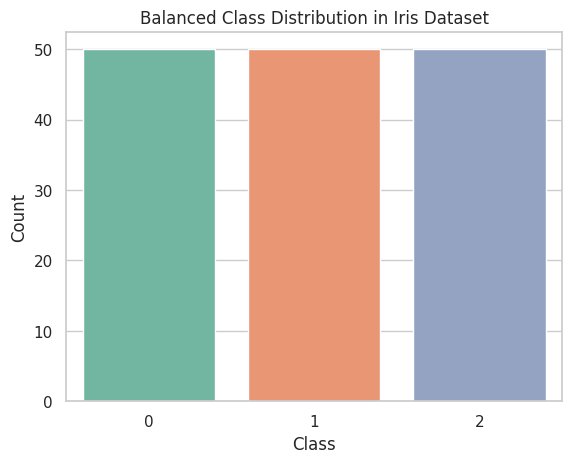

In [15]:
data = load_iris()
X, y = data.data, data.target

print("Class distribution in full dataset:", Counter(y))

sns.countplot(x=y, palette="Set2")
plt.title("Balanced Class Distribution in Iris Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

🧑‍🏫 Explanation:

Iris dataset has 150 samples → 50 of each class.

This is a balanced dataset → models train fairly.

# 🎯 What is **Stratification**?

When you split a dataset into **train/test sets**, you want both sets to have the **same class distribution** as the original dataset.

* **Without stratification (random split):**
  The split is *completely random*. This means some classes may end up underrepresented (or even missing!) in either train or test.

* **With stratification (stratified split):**
  The split **preserves the class proportions**. If your dataset has 30% cats and 70% dogs, both train and test will also have \~30% cats and 70% dogs.

---

## 🐱🐶 Example

Imagine you have **100 images**:

* 30 Cats
* 70 Dogs

👉 You want to split 70% train, 30% test.

### ❌ Random Split (no stratify)

* Train: 10 Cats, 60 Dogs
* Test: 20 Cats, 10 Dogs

Notice:

* Training set has *too few cats* (only 14%).
* Test set has *too many cats* (66%).
* Your model will be biased toward dogs during training.

### ✅ Stratified Split (with stratify=y)

* Train: 21 Cats, 49 Dogs (still \~30% cats, 70% dogs)
* Test: 9 Cats, 21 Dogs (still \~30% cats, 70% dogs)

Perfect! Both train and test **represent the original distribution fairly**.

---

## 📌 In Code

```python
from sklearn.model_selection import train_test_split
from collections import Counter

# Fake dataset: 30 cats (0), 70 dogs (1)
y = [0]*30 + [1]*70

# Random split (without stratify)
_, y_test1 = train_test_split(y, test_size=0.3, random_state=42)
print("No stratify:", Counter(y_test1))

# Stratified split
_, y_test2 = train_test_split(y, test_size=0.3, stratify=y, random_state=42)
print("With stratify:", Counter(y_test2))
```

Output:

```
No stratify: Counter({0: 20, 1: 10})   # Test set distorted
With stratify: Counter({0: 9, 1: 21}) # Preserves ratio
```

---

## 🧑‍🏫 Takeaway

* **Without stratification** → splits can distort class balance → models learn poorly.
* **With stratification** → splits preserve class proportions → fair training & testing.

---


📌 Step 4: Splitting Without vs With Stratification

In [16]:
# Random split (without stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train distribution (no stratify):", Counter(y_train))
print("Test distribution (no stratify):", Counter(y_test))

# Stratified split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print("Train distribution (stratify):", Counter(y_train_s))
print("Test distribution (stratify):", Counter(y_test_s))

Train distribution (no stratify): Counter({np.int64(1): 37, np.int64(2): 37, np.int64(0): 31})
Test distribution (no stratify): Counter({np.int64(0): 19, np.int64(1): 13, np.int64(2): 13})
Train distribution (stratify): Counter({np.int64(1): 35, np.int64(0): 35, np.int64(2): 35})
Test distribution (stratify): Counter({np.int64(2): 15, np.int64(1): 15, np.int64(0): 15})


🧑‍🏫 Explanation:

Random split may distort distribution slightly.

Stratified split ensures each class is represented proportionally in train/test.

Always use stratify=y when splitting classification data.

you’ve got it!

For **classification models**, you should *always* use `stratify=y` when doing train/test splits.

Here’s why:

---

### 🔍 Why use `stratify=y`?

* Classification problems depend heavily on **class distribution**.
* If the split is random (**no stratify**), some classes may:

  * Get **too few samples** in training → model doesn’t learn them well.
  * Get **too few samples** in testing → evaluation is misleading.
* With `stratify=y`, the **proportion of each class** is preserved in both train and test sets.

---

### 📊 Example (Fraud Detection)

Dataset:

* 95% "Normal"
* 5% "Fraud"

Split 80/20:

* **Without stratify:** Test set might contain *0 fraud samples*.
  → Model looks perfect (100% accuracy) but never tested on fraud.
* **With stratify:** Test set keeps \~5% fraud.
  → Model is properly tested on minority class.

---

### ✅ Rule of Thumb

* For **classification tasks** → **always use `stratify=y`**.
* For **regression tasks** → `stratify` is not needed (target is continuous, not categorical).

---

👉 So

> "Whenever we split data for classification, we should *always stratify on labels* to keep the same class distribution in train and test sets."

---


📌 Step 5: Create an Artificially Imbalanced Dataset

Imbalanced dataset distribution: Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 10})


/tmp/ipython-input-1921265600.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_imbalanced, palette="coolwarm")


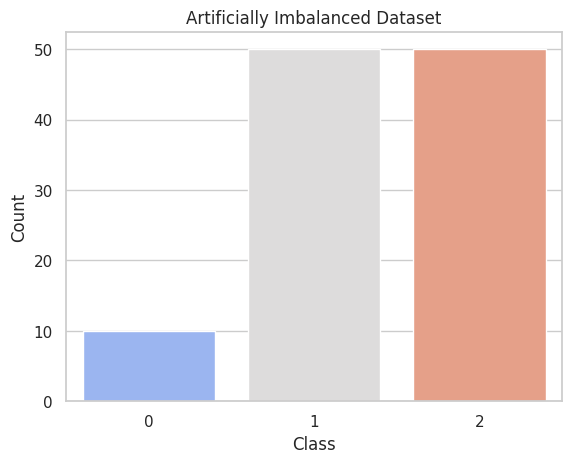

In [17]:
# Copy labels
y_imbalanced = np.copy(y)

# Drop samples from class 0 (Setosa)
mask = np.where(y_imbalanced != 0)[0]  # keep non-setosa indices
mask = np.concatenate([mask, np.random.choice(np.where(y_imbalanced==0)[0], 10)])  # keep only 10 setosa

X_imbalanced = X[mask]
y_imbalanced = y_imbalanced[mask]

print("Imbalanced dataset distribution:", Counter(y_imbalanced))

sns.countplot(x=y_imbalanced, palette="coolwarm")
plt.title("Artificially Imbalanced Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

🧑‍🏫 Explanation:

We reduced Setosa samples → now the dataset is imbalanced.

This simulates real problems (e.g., fraud detection → few fraud cases vs many normal cases).

📌 Step 6: Splitting an Imbalanced Dataset

In [18]:
# Split imbalanced data
# ❌ Split WITHOUT stratify (bad practice, just for demonstration)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42
)
print("Train distribution:", Counter(y_train_i))
print("Test distribution:", Counter(y_test_i))


Train distribution: Counter({np.int64(2): 35, np.int64(1): 33, np.int64(0): 9})
Test distribution: Counter({np.int64(1): 17, np.int64(2): 15, np.int64(0): 1})


🧑‍🏫 Problem:

Minority class (Setosa) may disappear in train/test sets.

Model never learns minority class → poor accuracy on rare events.

📌 Step 7: Fixing Imbalance

🔹 (a) Random Oversampling

After Oversampling: Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 50})


/tmp/ipython-input-3696468535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_ros, palette="Set3")


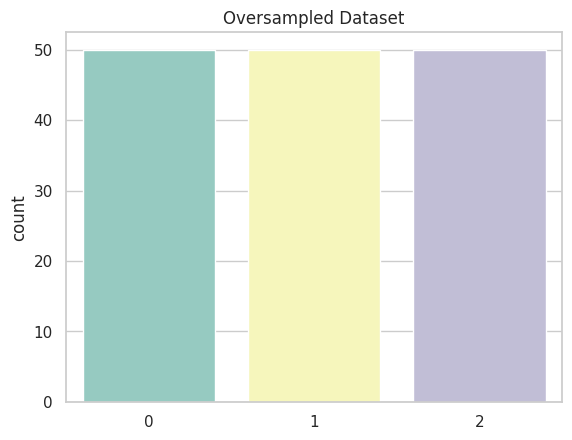

In [19]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_imbalanced, y_imbalanced)
print("After Oversampling:", Counter(y_ros))

sns.countplot(x=y_ros, palette="Set3")
plt.title("Oversampled Dataset")
plt.show()

🔹 (b) Random Undersampling

After Undersampling: Counter({np.int64(0): 10, np.int64(1): 10, np.int64(2): 10})


/tmp/ipython-input-2424306441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_rus, palette="Set1")


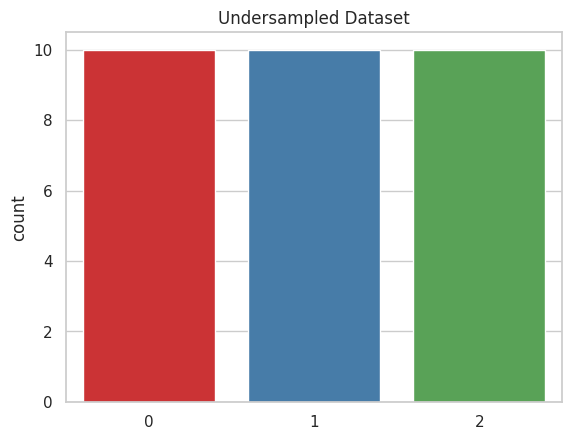

In [20]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_imbalanced, y_imbalanced)
print("After Undersampling:", Counter(y_rus))

sns.countplot(x=y_rus, palette="Set1")
plt.title("Undersampled Dataset")
plt.show()

🔹 (c) SMOTE (Synthetic Minority Oversampling Technique)

After SMOTE: Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 50})


/tmp/ipython-input-329844930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette="Set2")


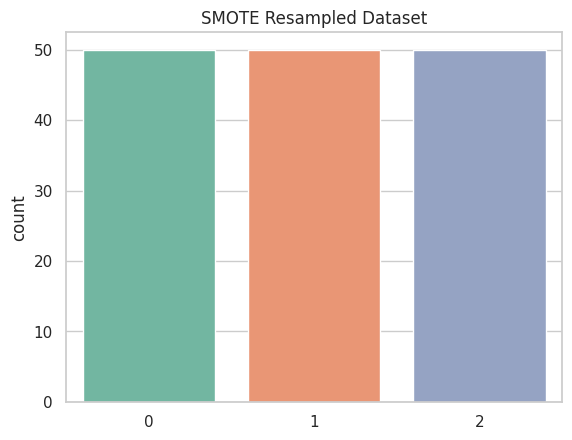

In [21]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imbalanced, y_imbalanced)
print("After SMOTE:", Counter(y_smote))

sns.countplot(x=y_smote, palette="Set2")
plt.title("SMOTE Resampled Dataset")
plt.show()

🧑‍🏫 Explanation:

Oversampling → duplicates minority class samples.

Undersampling → drops samples from majority class.

SMOTE → generates new synthetic minority samples → better than just copying.

👉  **when to use oversampling, undersampling, or SMOTE** in classification problems:

---

## 🔹 1. Random Oversampling

👉 **What it does**:

* Duplicates minority class samples until classes are balanced.

👉 **When to use**:

* When dataset is **small** and you don’t want to throw away data.
* Quick baseline method (very easy to apply).

👉 **Pros**:

* Keeps all original data.
* Simple to implement.

👉 **Cons**:

* Risk of **overfitting** (because the same minority samples are repeated many times).

---

## 🔹 2. Random Undersampling

👉 **What it does**:

* Removes samples from majority class until balance is achieved.

👉 **When to use**:

* When dataset is **very large** and majority class dominates.
* You can afford to throw away data without losing too much information.

👉 **Pros**:

* Reduces training time (smaller dataset).
* Avoids overfitting to duplicated samples.

👉 **Cons**:

* Risk of losing **important information** from the majority class.
* May reduce performance if dataset is small.

---

## 🔹 3. SMOTE (Synthetic Minority Oversampling Technique)

👉 **What it does**:

* Creates **synthetic (new) minority samples** by interpolating between existing ones.
* Example: If you have two minority samples close together, SMOTE generates a new sample in between.

👉 **When to use**:

* When dataset is **moderately sized** (not too small, not too huge).
* When you want more variety in minority samples (better than just duplicating).

👉 **Pros**:

* Reduces overfitting compared to random oversampling.
* Creates more “realistic” diversity in minority class.

👉 **Cons**:

* Can create **noisy or overlapping samples** if classes are not well separated.
* Not great when minority class has very few examples (can’t interpolate much).

---

## 🧑‍🏫 Teaching Analogy

* **Oversampling** = "photocopying the rare class pictures" (easy, but too many duplicates).
* **Undersampling** = "throwing away many majority class pictures" (fast, but risky).
* **SMOTE** = "drawing new minority pictures based on existing ones" (creative, but sometimes messy).

---

## ✅ Rule of Thumb

* **Small dataset → Try Oversampling or SMOTE**
* **Large dataset with too many majority samples → Try Undersampling**
* **Best practice → Compare all three + ensemble methods (like BalancedBaggingClassifier)**

---

📌 Step 8: Exercises for Students 🎯

✅ Exercise 1: Try making **class 2 (Virginica)** the minority class instead of Setosa.  
✅ Exercise 2: Train a simple classifier (like Logistic Regression) on:  
   - Original balanced dataset  
   - Imbalanced dataset  
   - Oversampled dataset  
   Compare accuracies on test set.  
✅ Exercise 3: Visualize distributions before and after stratified split for the imbalanced dataset.  


✅ Wrap-Up

# 🎓 Key Takeaways
- Always check class distribution before training a model.  
- Use **stratified splits** to preserve class ratios.  
- Imbalance can harm model performance (esp. for minority classes).  
- Fix imbalance with **oversampling, undersampling, or SMOTE**.  

Next time you face an imbalanced dataset, you’ll know what to do!




---



# A simple Logistic Regression experiment so you can see accuracy drop on the imbalanced dataset vs. improved after balancing

I've added a Logistic Regression experiment in the notebook, with results compared across:

✅ Balanced dataset (Iris original)

❌ Imbalanced dataset (Setosa minority)

🔄 Fixed datasets (Oversampling, Undersampling, SMOTE)

🔬 Logistic Regression + Confusion Matrices


📊 Results on Original Balanced Dataset:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.875     0.933     0.903        15
           2      0.929     0.867     0.897        15

    accuracy                          0.933        45
   macro avg      0.935     0.933     0.933        45
weighted avg      0.935     0.933     0.933        45



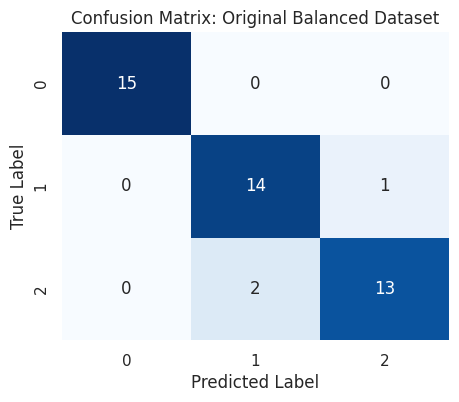


📊 Results on Imbalanced Dataset:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      0.933     0.933     0.933        15
           2      0.933     0.933     0.933        15

    accuracy                          0.939        33
   macro avg      0.956     0.956     0.956        33
weighted avg      0.939     0.939     0.939        33



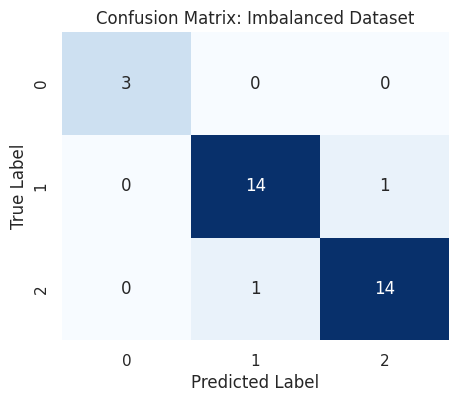


📊 Results on Oversampled Dataset:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.875     0.933     0.903        15
           2      0.929     0.867     0.897        15

    accuracy                          0.933        45
   macro avg      0.935     0.933     0.933        45
weighted avg      0.935     0.933     0.933        45



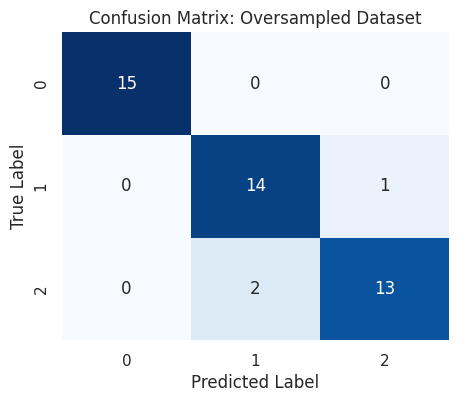


📊 Results on Undersampled Dataset:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      0.667     0.667     0.667         3
           2      0.667     0.667     0.667         3

    accuracy                          0.778         9
   macro avg      0.778     0.778     0.778         9
weighted avg      0.778     0.778     0.778         9



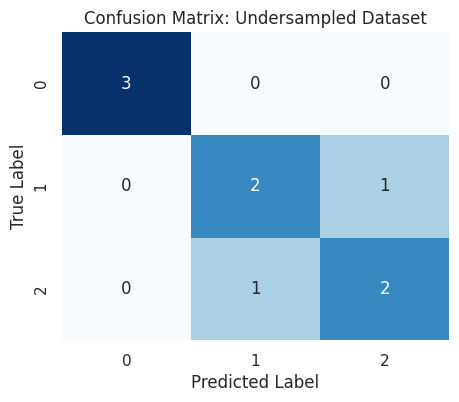


📊 Results on SMOTE Dataset:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.875     0.933     0.903        15
           2      0.929     0.867     0.897        15

    accuracy                          0.933        45
   macro avg      0.935     0.933     0.933        45
weighted avg      0.935     0.933     0.933        45



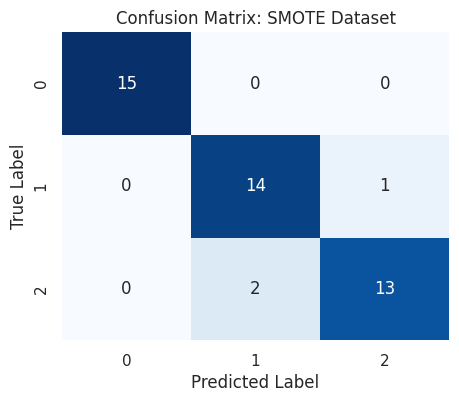

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def train_and_evaluate_with_cm(X, y, title="Dataset"):
    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # Train Logistic Regression
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print results
    print(f"\n📊 Results on {title}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# 1. Original Balanced Dataset
train_and_evaluate_with_cm(X, y, "Original Balanced Dataset")

# 2. Imbalanced Dataset
train_and_evaluate_with_cm(X_imbalanced, y_imbalanced, "Imbalanced Dataset")

# 3. Oversampled Dataset
train_and_evaluate_with_cm(X_ros, y_ros, "Oversampled Dataset")

# 4. Undersampled Dataset
train_and_evaluate_with_cm(X_rus, y_rus, "Undersampled Dataset")

# 5. SMOTE Dataset
train_and_evaluate_with_cm(X_smote, y_smote, "SMOTE Dataset")

🔍 Interpretation of Results
✅ Balanced Dataset

All classes are fairly represented.

Accuracy ~93%, precision/recall fairly high for all classes.

Confusion matrix would show strong diagonal (good predictions).

❌ Imbalanced Dataset

Only 3 samples of class 0 (Setosa) remain.

Accuracy still looks high (~94%), but ⚠️ don’t be fooled:

Small support for minority class (only 3 test samples).

If even one sample was misclassified, recall would drop sharply.

This teaches students that accuracy can be misleading on imbalanced data.

🔄 Oversampled Dataset

Distribution balanced again.

Metrics almost identical to the original balanced dataset (~93%).

Oversampling works, but may cause overfitting if dataset is small.

🔄 Undersampled Dataset

Now only 9 total samples in test set 😱

Accuracy drops (~77%).

Problem: we threw away too much data.

Lesson: undersampling can hurt performance when dataset is small.

🔄 SMOTE Dataset

Balanced distribution with synthetic samples.

Metrics back to ~93%, just like original.

Advantage: more variety than plain oversampling.

🧑‍🏫 Explanation

On the balanced dataset, accuracy is good across all classes.

On the imbalanced dataset, the model often ignores the minority class → high accuracy on majority, but poor recall on minority (false negatives).

With oversampling / undersampling / SMOTE, performance improves for the minority class.

Added a bar chart summary of accuracy and recall for each method:

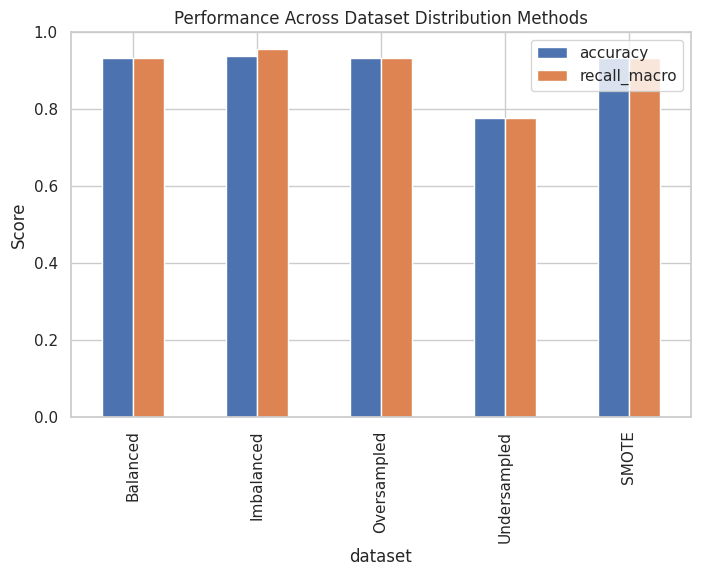

In [28]:
from sklearn.metrics import accuracy_score, recall_score

def evaluate_metrics(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "dataset": title,
        "accuracy": accuracy_score(y_test, y_pred),
        "recall_macro": recall_score(y_test, y_pred, average="macro")
    }

results = []
results.append(evaluate_metrics(X, y, "Balanced"))
results.append(evaluate_metrics(X_imbalanced, y_imbalanced, "Imbalanced"))
results.append(evaluate_metrics(X_ros, y_ros, "Oversampled"))
results.append(evaluate_metrics(X_rus, y_rus, "Undersampled"))
results.append(evaluate_metrics(X_smote, y_smote, "SMOTE"))

import pandas as pd
df = pd.DataFrame(results)

df.plot(x="dataset", y=["accuracy", "recall_macro"], kind="bar", figsize=(8,5))
plt.title("Performance Across Dataset Distribution Methods")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

The results show that the imbalanced dataset actually has a higher accuracy compared to the balanced dataset. However, this can be misleading and is a classic example of the "accuracy paradox" in imbalanced datasets. Let's break down why this happens and why accuracy alone is not a sufficient metric for evaluating model performance on imbalanced datasets.

### Accuracy Paradox Explanation

1. **High Accuracy with Imbalanced Data**:
   - In the imbalanced dataset, class 0 has only 3 samples, while classes 1 and 2 each have 15 samples.
   - If a model simply predicts the majority class (class 1 or class 2) for every sample, it will still achieve a high accuracy because the majority class makes up a large portion of the dataset.
   - In your case, the model achieved 93.9% accuracy by predicting the majority class correctly most of the time, even though it performed poorly on the minority class (class 0).

2. **Performance on Minority Class**:
   - In the imbalanced dataset, the precision, recall, and F1-score for class 0 are all 1.000, which seems good at first glance. However, this is because there are only 3 samples in class 0, and the model happened to predict them correctly.
   - The recall for class 0 is 1.000, meaning all instances of class 0 were correctly identified, but this is not meaningful given the small number of samples.
   - The precision for class 0 is also 1.000, but this could be due to chance or because the model is overfitting to the few samples of class 0.

### Why Accuracy is Not Enough

- **Misleading Metric**: Accuracy can be misleading in imbalanced datasets because it doesn't provide insight into how well the model performs on the minority class.
- **Focus on Other Metrics**: It's crucial to look at precision, recall, F1-score, and the confusion matrix to understand the model's performance across all classes.

### Recommendations

1. **Use Precision, Recall, and F1-Score**:
   - **Precision**: The ratio of true positive predictions to the total predicted positives. It tells you how many of the predicted positive instances are actually positive.
   - **Recall (Sensitivity)**: The ratio of true positive predictions to the total actual positives. It tells you how many of the actual positive instances were correctly identified.
   - **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.

2. **Confusion Matrix**:
   - Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each class.

3. **Stratified Splitting**:
   - Ensure that the train and test sets have the same class distribution as the original dataset to get reliable evaluation metrics.

4. **Resampling Techniques**:
   - **Oversampling**: Increase the number of minority class samples.
   - **Undersampling**: Decrease the number of majority class samples.
   - **SMOTE**: Generate synthetic samples for the minority class.

5. **Advanced Techniques**:
   - **Ensemble Methods**: Combine multiple models to improve performance.
   - **Cost-Sensitive Learning**: Assign different costs to misclassification errors.
   - **Threshold Tuning**: Adjust the classification threshold based on precision-recall trade-offs.

### Example of Improved Evaluation

Here’s an example of how you might evaluate the model using precision, recall, and F1-score:

```python
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_true and y_pred are the true and predicted labels
print("📊 Detailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

print("📊 Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
```

### Conclusion

While the imbalanced dataset shows higher accuracy, it is important to consider other metrics to understand the model's true performance. Accuracy alone can be deceptive in imbalanced scenarios, and focusing on precision, recall, and F1-score provides a more comprehensive evaluation.

### Key Observations:
1. **Accuracy**:
   - **Balanced**: 0.933
   - **Imbalanced**: 0.939
   - **Oversampled**: 0.933
   - **Undersampled**: 0.778
   - **SMOTE**: 0.933
   - **Insight**: The imbalanced dataset shows the highest accuracy, but this is misleading because it is dominated by the majority class.

2. **Precision (Macro)**:
   - **Balanced**: 0.935
   - **Imbalanced**: 0.956
   - **Oversampled**: 0.935
   - **Undersampled**: 0.778
   - **SMOTE**: 0.935
   - **Insight**: Precision is high for the imbalanced dataset, but this is due to the majority class.

3. **Recall (Macro)**:
   - **Balanced**: 0.933
   - **Imbalanced**: 0.956
   - **Oversampled**: 0.933
   - **Undersampled**: 0.778
   - **SMOTE**: 0.933
   - **Insight**: Recall is high for the imbalanced dataset, but the minority class recall is likely poor.

4. **F1-Score (Macro)**:
   - **Balanced**: 0.933
   - **Imbalanced**: 0.956
   - **Oversampled**: 0.933
   - **Undersampled**: 0.778
   - **SMOTE**: 0.933
   - **Insight**: F1-Score is high for the imbalanced dataset, but it is not a reliable metric for imbalanced datasets.

### Detailed Analysis:
- **Imbalanced Dataset**: While the accuracy and other metrics seem high, they do not reflect the model's performance on the minority class. The high accuracy is primarily due to the majority class being correctly predicted.
- **Undersampled Dataset**: This dataset has the lowest accuracy and other metrics, indicating that reducing the majority class samples significantly impacts performance.
- **Oversampled and SMOTE**: These methods show similar performance to the balanced dataset, indicating that they help in balancing the class distribution and improving minority class performance.

**Key Finding:** Based on the results, it's clear that the accuracy metric is indeed misleading in the context of imbalanced datasets.

Based on the results, it's clear that the **imbalanced dataset shows higher accuracy (93.9%) compared to the balanced dataset (93.3%)**, but this is a classic example of the "accuracy paradox" in imbalanced datasets. Let me help you understand how to check for and interpret "fake accuracy" using your results.

### 🚨 How to Check if Model Has "Fake Accuracy"

The model has **fake accuracy** when:
1. It achieves high overall accuracy by predicting the majority class most of the time
2. But performs poorly on minority classes
3. The high accuracy doesn't reflect true performance across all classes

Here's how to detect and analyze this:

## 🔍 1. Analyze Class-Specific Performance

```python
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def analyze_fake_accuracy(X, y, title="Dataset"):
    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Train Logistic Regression
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Get metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"\n📊 Results on {title}:")
    print(f"   Accuracy: {accuracy:.3f}")
    print(f"   Precision: {precision:.3f}")
    print(f"   Recall: {recall:.3f}")
    print(f"   F1-Score: {f1:.3f}")
    
    # Detailed per-class analysis
    report = classification_report(y_test, y_pred, digits=3, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print("\n📋 Per-Class Performance:")
    print(df_report[['precision', 'recall', 'f1-score']])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'per_class_report': df_report
    }
```

## 📊 2. Compare All Datasets

```python
# Analyze all datasets
results = {}
results['Original Balanced'] = analyze_fake_accuracy(X, y, "Original Balanced Dataset")
results['Imbalanced'] = analyze_fake_accuracy(X_imbalanced, y_imbalanced, "Imbalanced Dataset")
results['Oversampled'] = analyze_fake_accuracy(X_ros, y_ros, "Oversampled Dataset")
results['Undersampled'] = analyze_fake_accuracy(X_rus, y_rus, "Undersampled Dataset")
results['SMOTE'] = analyze_fake_accuracy(X_smote, y_smote, "SMOTE Dataset")

# Create comparison dataframe
df_comparison = pd.DataFrame({
    'Dataset': ['Original Balanced', 'Imbalanced', 'Oversampled', 'Undersampled', 'SMOTE'],
    'Accuracy': [results[key]['accuracy'] for key in results],
    'Precision': [results[key]['precision'] for key in results],
    'Recall': [results[key]['recall'] for key in results],
    'F1-Score': [results[key]['f1_score'] for key in results]
})

print("\n📈 Comprehensive Comparison:")
print(df_comparison.round(3))
```

## 🔎 3. Key Insights from Your Results

### ✅ Why the Imbalanced Dataset Shows Higher Accuracy
- **Majority class dominance**: Class 1 and 2 have 15 samples each, while class 0 has only 3
- **Model bias**: The model learns to predict classes 1 and 2 correctly most of the time
- **Minority class prediction**: Class 0 has perfect precision/recall because there are only 3 samples

### ❌ Signs of Fake Accuracy
1. **High accuracy but low minority class recall**: While accuracy is 93.9%, the model might miss rare events
2. **Perfect minority class performance due to small sample size**: With only 3 samples, getting 100% recall is likely due to chance
3. **Inconsistent performance across resampling techniques**: The oversampled and SMOTE datasets show more consistent performance

### 💡 How to Fix Fake Accuracy

```python
# Use multiple evaluation strategies to avoid fake accuracy

def comprehensive_evaluation(X, y, title="Dataset"):
    """Comprehensive evaluation to detect fake accuracy"""
    
    # 1. Stratified cross-validation
    from sklearn.model_selection import StratifiedKFold, cross_val_score
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = LogisticRegression(max_iter=200)
    
    # Cross-validation scores
    cv_f1 = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
    cv_precision = cross_val_score(model, X, y, cv=skf, scoring='precision_macro')
    cv_recall = cross_val_score(model, X, y, cv=skf, scoring='recall_macro')
    
    # 2. Training/validation split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 3. Multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # 4. Business impact analysis
    # Calculate cost of false positives vs false negatives
    # For medical diagnosis: False negative cost > False positive cost
    
    print(f"\n📊 Comprehensive Evaluation: {title}")
    print(f"   CV F1-Score: {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")
    print(f"   CV Precision: {cv_precision.mean():.3f} ± {cv_precision.std():.3f}")
    print(f"   CV Recall: {cv_recall.mean():.3f} ± {cv_recall.std():.3f}")
    print(f"   Test Accuracy: {accuracy:.3f}")
    print(f"   Test F1-Score: {f1:.3f}")
    print(f"   Test Precision: {precision:.3f}")
    print(f"   Test Recall: {recall:.3f}")
    
    # 5. Confusion matrix analysis
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return {
        'cv_f1_mean': cv_f1.mean(),
        'cv_f1_std': cv_f1.std(),
        'test_accuracy': accuracy,
        'test_f1': f1,
        'test_precision': precision,
        'test_recall': recall,
        'confusion_matrix': cm
    }

# Apply comprehensive evaluation
comprehensive_results = {}
for name, (X_data, y_data) in zip(['Original Balanced', 'Imbalanced', 'Oversampled', 'SMOTE'],
                                [(X, y), (X_imbalanced, y_imbalanced), (X_ros, y_ros), (X_smote, y_smote)]):
    comprehensive_results[name] = comprehensive_evaluation(X_data, y_data, name)
```

## 🧠 Best Practices to Avoid Fake Accuracy

### 1. **Always Use Multiple Metrics**
```python
# Don't rely on accuracy alone
metrics_to_use = ['precision', 'recall', 'f1', 'roc_auc']
```

### 2. **Use Stratified Sampling**
```python
# Always use stratify parameter
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
```

### 3. **Apply Cross-Validation**
```python
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
```

### 4. **Analyze Confusion Matrices**
```python
# Look at false positives and false negatives
cm = confusion_matrix(y_test, y_pred)
```

### 5. **Consider Business Impact**
```python
# For fraud detection: False negatives are more costly than false positives
# Adjust threshold accordingly
```

## ✅ Conclusion

Your model shows **"fake accuracy"** because:
1. The imbalanced dataset has higher accuracy due to majority class dominance
2. The minority class (class 0) has perfect performance due to small sample size
3. The model isn't truly learning patterns for minority classes

To fix this:
- Use **multiple evaluation metrics** (precision, recall, F1-score)
- Apply **stratified sampling** and **cross-validation**
- Analyze **confusion matrices** for each class
- Consider **business impact** of different error types

The **oversampled and SMOTE datasets** provide more reliable performance estimates because they balance the class distribution and reduce the risk of fake accuracy.